In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split , cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score,log_loss,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn import set_config
set_config(display='diagram')
from wordcloud import WordCloud
import folium
import plotly

<Figure size 1152x648 with 0 Axes>

In [365]:
import warnings
warnings.filterwarnings('ignore')

In [263]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 

from xgboost import XGBRegressor



from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [414]:
df1 = pd.read_csv('Swiggy_delivery_time_pred.csv')

In [415]:
df = df1.copy()

In [416]:
df.shape

(45584, 20)

In [417]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [418]:
df.sample(3)

ID Delivery_person_ID  Delivery_person_Age  \
22617  0x3da0     CHENRES16DEL01                 21.0   
15261  0x85fb     PUNERES17DEL01                 26.0   
8602   0x6124    COIMBRES05DEL01                 35.0   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
22617                      4.7            13.049645             80.242268   
15261                      4.8            18.530963             73.828972   
8602                       4.7            11.022169             76.999594   

       Delivery_location_latitude  Delivery_location_longitude  Order_Date  \
22617                   13.089645                    80.282268  21-03-2022   
15261                   18.640963                    73.938972  20-03-2022   
8602                    11.062169                    77.039594  09-03-2022   

      Time_Orderd Time_Order_picked Weather_conditions Road_traffic_density  \
22617       13:35             13:50         Sandstorms                 High   
15261       21:15             21:20             Cloudy                  Jam   
8602        12:40             12:55                Fog                 High   

       Vehicle_condition Type_of_order Type_of_vehicle  multiple_deliveries  \
22617                  1        Buffet      motorcycle                  1.0   
15261                  1        Drinks         scooter                  1.0   
8602                   0        Drinks      motorcycle                  1.0   

      Festival           City  Time_taken (min)  
22617       No  Metropolitian                13  
15261       No  Metropolitian                35  
8602        No  Metropolitian                34

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [420]:
df.describe(include='all').T

count unique            top   freq       mean  \
ID                             45584  45584         0xcdcd      1        NaN   
Delivery_person_ID             45584   1320  JAPRES11DEL02     67        NaN   
Delivery_person_Age          43730.0    NaN            NaN    NaN  29.566911   
Delivery_person_Ratings      43676.0    NaN            NaN    NaN   4.633774   
Restaurant_latitude          45584.0    NaN            NaN    NaN  17.017948   
Restaurant_longitude         45584.0    NaN            NaN    NaN  70.229684   
Delivery_location_latitude   45584.0    NaN            NaN    NaN   17.46548   
Delivery_location_longitude  45584.0    NaN            NaN    NaN  70.844161   
Order_Date                     45584     44     15-03-2022   1192        NaN   
Time_Orderd                    43853    176          21:55    461        NaN   
Time_Order_picked              45584    193          21:30    495        NaN   
Weather_conditions             44968      6            Fog   7653        NaN   
Road_traffic_density           44983      4            Low  15476        NaN   
Vehicle_condition            45584.0    NaN            NaN    NaN   1.023385   
Type_of_order                  45584      4          Snack  11530        NaN   
Type_of_vehicle                45584      4     motorcycle  26429        NaN   
multiple_deliveries          44591.0    NaN            NaN    NaN   0.744635   
Festival                       45356      2             No  44460        NaN   
City                           44384      3  Metropolitian  34087        NaN   
Time_taken (min)             45584.0    NaN            NaN    NaN  26.293963   

                                   std        min        25%        50%  \
ID                                 NaN        NaN        NaN        NaN   
Delivery_person_ID                 NaN        NaN        NaN        NaN   
Delivery_person_Age           5.815064       15.0       25.0       30.0   
Delivery_person_Ratings       0.334744        1.0        4.5        4.7   
Restaurant_latitude           8.185674 -30.905562  12.933284   18.55144   
Restaurant_longitude         22.885575 -88.366217      73.17  75.897963   
Delivery_location_latitude    7.335562       0.01  12.988453  18.633934   
Delivery_location_longitude  21.120578       0.01      73.28  76.002574   
Order_Date                         NaN        NaN        NaN        NaN   
Time_Orderd                        NaN        NaN        NaN        NaN   
Time_Order_picked                  NaN        NaN        NaN        NaN   
Weather_conditions                 NaN        NaN        NaN        NaN   
Road_traffic_density               NaN        NaN        NaN        NaN   
Vehicle_condition             0.839055        0.0        0.0        1.0   
Type_of_order                      NaN        NaN        NaN        NaN   
Type_of_vehicle                    NaN        NaN        NaN        NaN   
multiple_deliveries            0.57251        0.0        0.0        1.0   
Festival                           NaN        NaN        NaN        NaN   
City                               NaN        NaN        NaN        NaN   
Time_taken (min)              9.384298       10.0       19.0       26.0   

                                   75%        max  
ID                                 NaN        NaN  
Delivery_person_ID                 NaN        NaN  
Delivery_person_Age               35.0       50.0  
Delivery_person_Ratings            4.9        6.0  
Restaurant_latitude          22.728163  30.914057  
Restaurant_longitude         78.044095  88.433452  
Delivery_location_latitude   22.785049  31.054057  
Delivery_location_longitude  78.107044  88.563452  
Order_Date                         NaN        NaN  
Time_Orderd                        NaN        NaN  
Time_Order_picked                  NaN        NaN  
Weather_conditions                 NaN        NaN  
Road_traffic_density               NaN        NaN  
Vehicle_condition                  2.0        

In [421]:
df.duplicated().sum()

0

In [422]:
df.isnull().sum() /len(df)*100

ID                             0.000000
Delivery_person_ID             0.000000
Delivery_person_Age            4.067217
Delivery_person_Ratings        4.185679
Restaurant_latitude            0.000000
Restaurant_longitude           0.000000
Delivery_location_latitude     0.000000
Delivery_location_longitude    0.000000
Order_Date                     0.000000
Time_Orderd                    3.797385
Time_Order_picked              0.000000
Weather_conditions             1.351351
Road_traffic_density           1.318445
Vehicle_condition              0.000000
Type_of_order                  0.000000
Type_of_vehicle                0.000000
multiple_deliveries            2.178396
Festival                       0.500176
City                           2.632503
Time_taken (min)               0.000000
dtype: float64

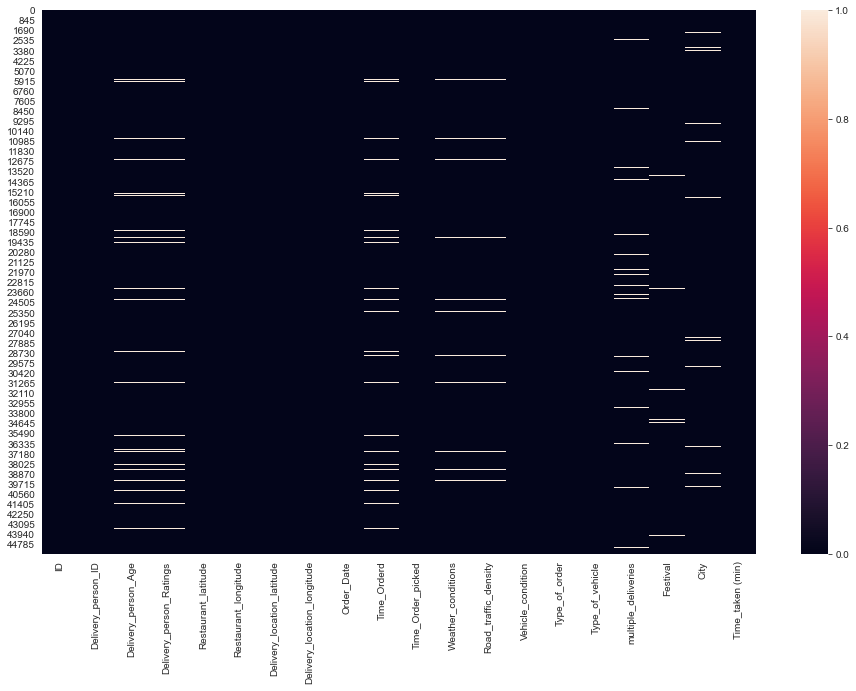

In [424]:
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull());

In [425]:
df.select_dtypes(include='object').columns

Index(['ID', 'Delivery_person_ID', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')

In [426]:
df.select_dtypes(exclude='object').columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)'],
      dtype='object')

In [427]:
df.dtypes.value_counts()

object     11
float64     7
int64       2
dtype: int64

In [428]:
for i in df.columns:
    k = df[i].unique()
    if len(k)<25:
        print(f" data types of {i} is {df[i].dtypes} and  unique values are {df[i].unique()}  ") 
              
        print(" ")
    else:
        print(f"  data types of {i} is {df[i].dtypes} and no of unique values are {df[i].nunique()}")
        
        print(" ")

  data types of ID is object and no of unique values are 45584
 
  data types of Delivery_person_ID is object and no of unique values are 1320
 
 data types of Delivery_person_Age is float64 and  unique values are [36. 21. 23. 34. 24. 29. 35. 33. 25. 31. 37. 27. 32. 26. 38. 20. 22. nan
 28. 39. 30. 15. 50.]  
 
  data types of Delivery_person_Ratings is float64 and no of unique values are 28
 
  data types of Restaurant_latitude is float64 and no of unique values are 657
 
  data types of Restaurant_longitude is float64 and no of unique values are 518
 
  data types of Delivery_location_latitude is float64 and no of unique values are 4373
 
  data types of Delivery_location_longitude is float64 and no of unique values are 4373
 
  data types of Order_Date is object and no of unique values are 44
 
  data types of Time_Orderd is object and no of unique values are 176
 
  data types of Time_Order_picked is object and no of unique values are 193
 
 data types of Weather_conditions is obje

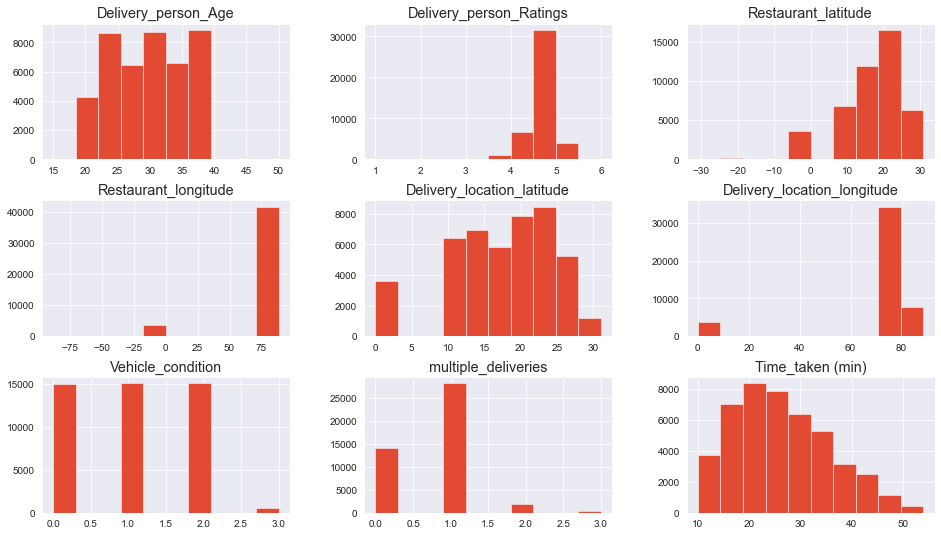

In [429]:
df.hist(figsize=(16,9));

<Figure size 1152x648 with 0 Axes>

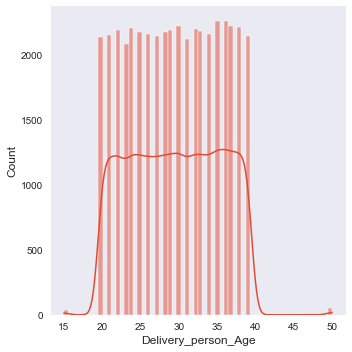

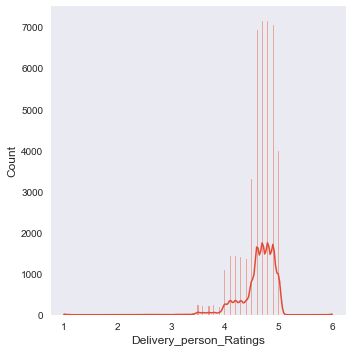

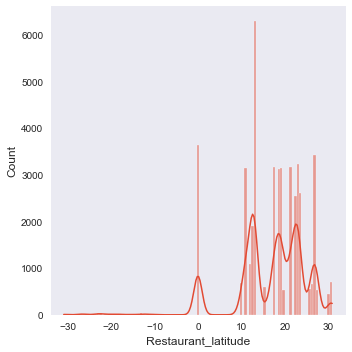

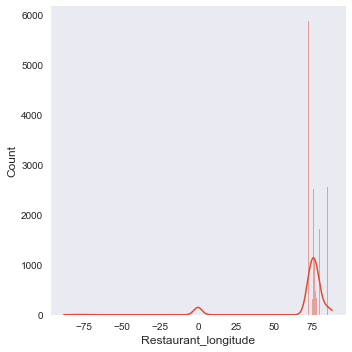

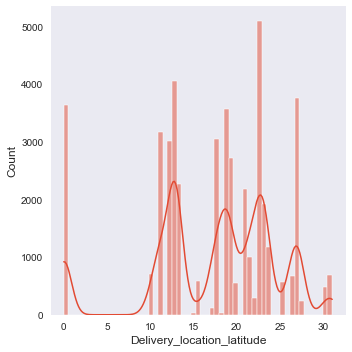

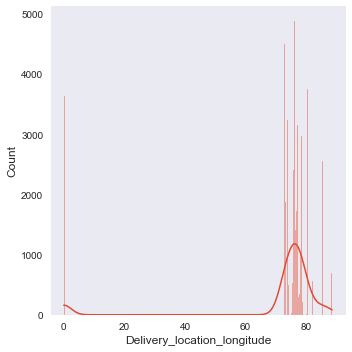

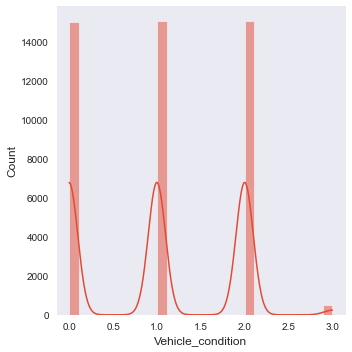

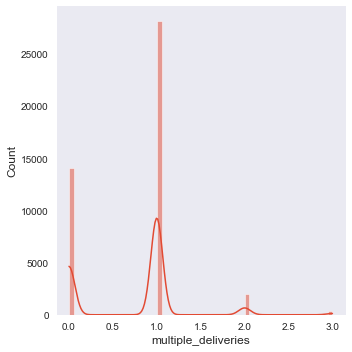

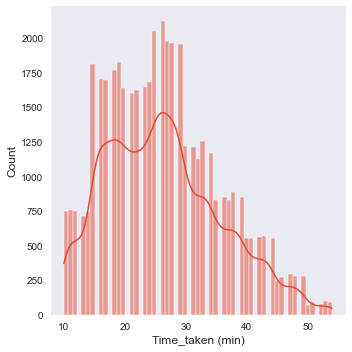

In [431]:
plt.figure(figsize=(16,9))
for i in df.select_dtypes(exclude='object'):
    sns.displot(df[i] , kde=True);

In [432]:
df.sample()

ID Delivery_person_ID  Delivery_person_Age  \
23699  0xa2af     INDORES05DEL03                 21.0   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
23699                      4.6            22.727021             75.884167   

       Delivery_location_latitude  Delivery_location_longitude  Order_Date  \
23699                   22.757021                    75.914167  24-03-2022   

      Time_Orderd Time_Order_picked Weather_conditions Road_traffic_density  \
23699       22:50             23:05             Cloudy                  Low   

       Vehicle_condition Type_of_order Type_of_vehicle  multiple_deliveries  \
23699                  1         Snack         scooter                  0.0   

      Festival   City  Time_taken (min)  
23699       No  Urban                13

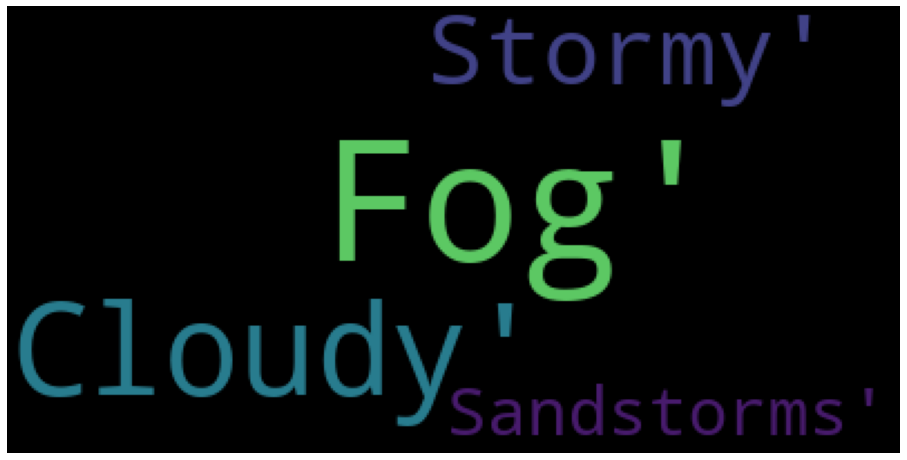

In [433]:
plt.figure(figsize=(16,9))
text = df['Weather_conditions'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [434]:
df.sample()

ID Delivery_person_ID  Delivery_person_Age  \
28736  0x3637      JAPRES13DEL01                 25.0   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
28736                      4.6            26.846156               75.8023   

       Delivery_location_latitude  Delivery_location_longitude  Order_Date  \
28736                   26.956156                      75.9123  29-03-2022   

      Time_Orderd Time_Order_picked Weather_conditions Road_traffic_density  \
28736       17:15             17:25             Stormy               Medium   

       Vehicle_condition Type_of_order Type_of_vehicle  multiple_deliveries  \
28736                  1        Buffet      motorcycle                  0.0   

      Festival           City  Time_taken (min)  
28736       No  Metropolitian                22

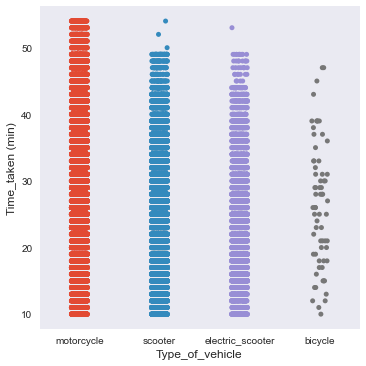

In [435]:
sns.catplot(x="Type_of_vehicle", y="Time_taken (min)",
                data=df);

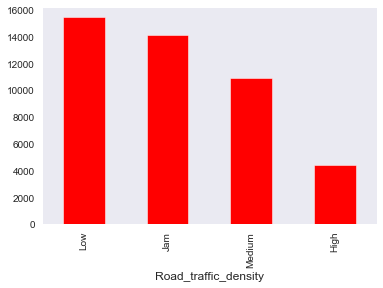

In [436]:
df.groupby('Road_traffic_density')['ID'].count().sort_values(ascending=False).plot(kind='bar',color='red');

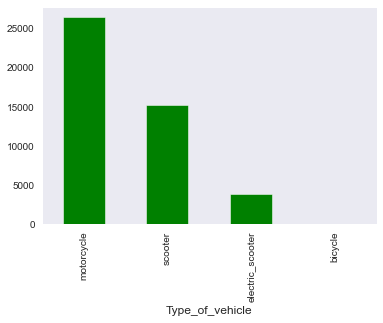

In [437]:
df.groupby('Type_of_vehicle')['ID'].count().sort_values(ascending=False).plot(kind='bar',color='green');

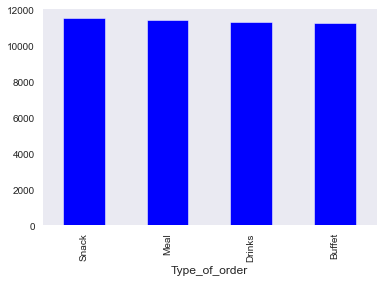

In [438]:
df.groupby('Type_of_order')['ID'].count().sort_values(ascending=False).plot(kind='bar',color='blue');

In [439]:
df.sample(1)

ID Delivery_person_ID  Delivery_person_Age  \
10203  0x9f2b    COIMBRES01DEL01                 37.0   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
10203                      4.7            11.016298             76.972076   

       Delivery_location_latitude  Delivery_location_longitude  Order_Date  \
10203                   11.126298                    77.082076  06-04-2022   

      Time_Orderd Time_Order_picked Weather_conditions Road_traffic_density  \
10203       22:25             22:40              Windy                  Low   

       Vehicle_condition Type_of_order Type_of_vehicle  multiple_deliveries  \
10203                  1         Snack         scooter                  1.0   

      Festival           City  Time_taken (min)  
10203       No  Metropolitian                21

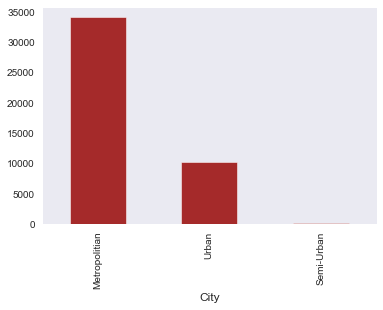

In [440]:
df.groupby('City')['ID'].count().sort_values(ascending=False).plot(kind='bar',color='brown');

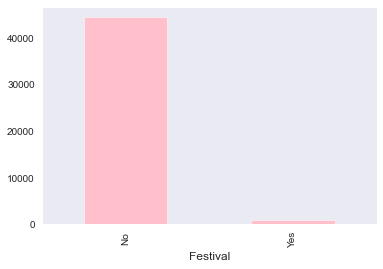

In [441]:
df.groupby('Festival')['ID'].count().sort_values(ascending=False).plot(kind='bar',color='pink');

In [442]:
df.sample()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
2925  0x4470      SURRES13DEL01                 25.0                      4.9   

      Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
2925            21.170096             72.789122                   21.180096   

      Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
2925                    72.799122  19-03-2022       08:55             09:10   

     Weather_conditions Road_traffic_density  Vehicle_condition Type_of_order  \
2925             Cloudy                  Low                  1          Meal   

     Type_of_vehicle  multiple_deliveries Festival   City  Time_taken (min)  
2925         scooter                  1.0       No  Urban                12

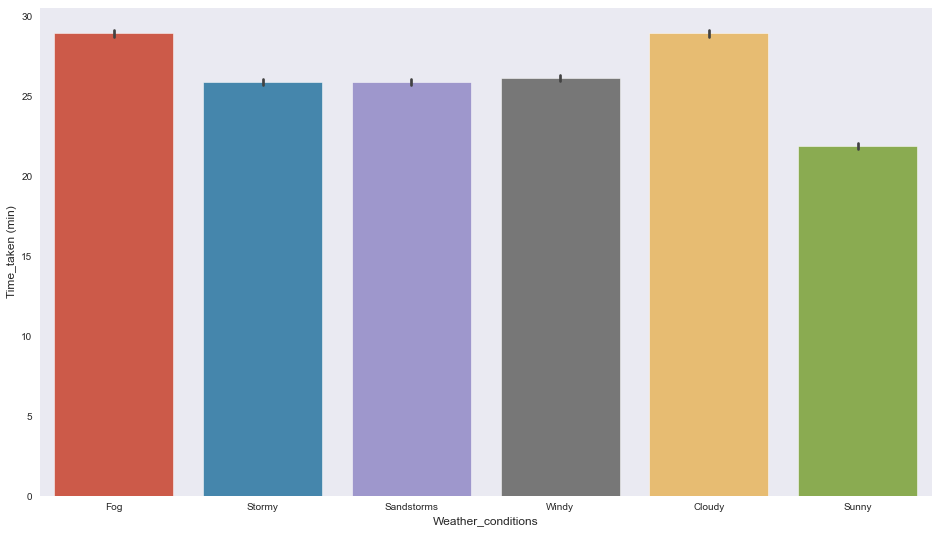

In [443]:
plt.figure(figsize=(16,9))
sns.barplot(x='Weather_conditions',y='Time_taken (min)',data=df);

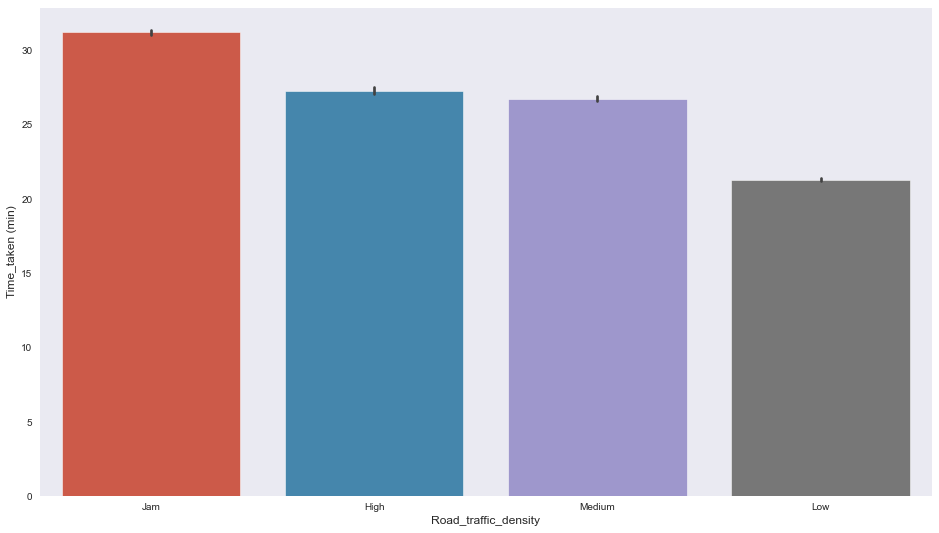

In [444]:
plt.figure(figsize=(16,9))
sns.barplot(x='Road_traffic_density',y='Time_taken (min)',data=df);

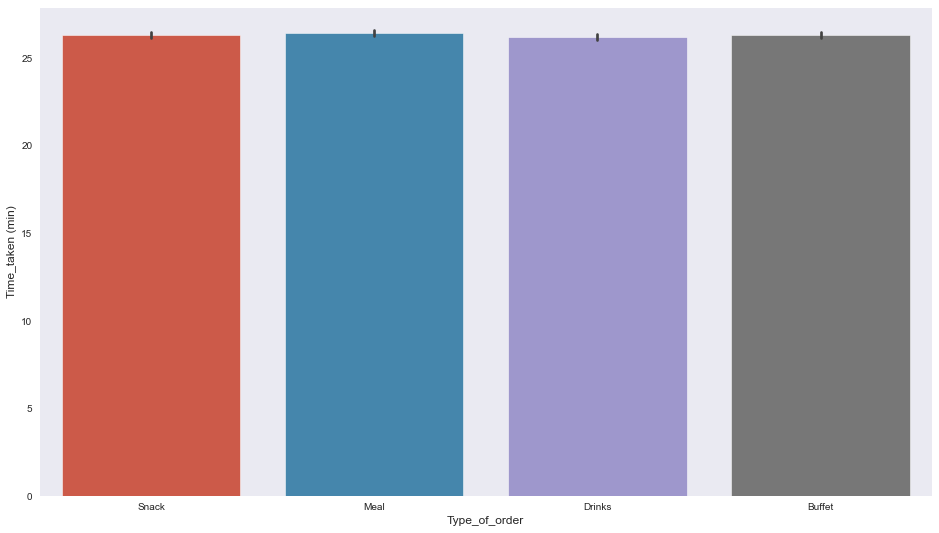

In [445]:
plt.figure(figsize=(16,9))
sns.barplot(x='Type_of_order',y='Time_taken (min)',data=df);

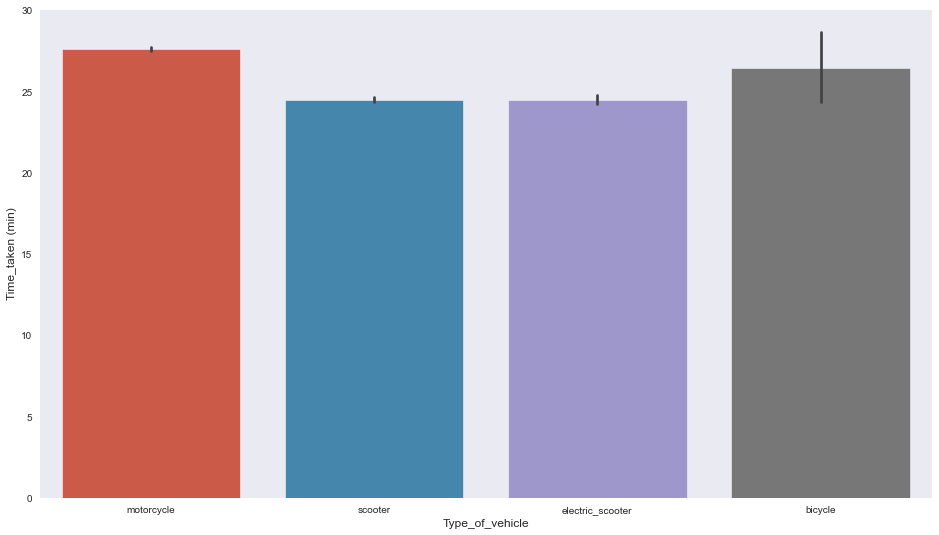

In [446]:
plt.figure(figsize=(16,9))
sns.barplot(x='Type_of_vehicle',y='Time_taken (min)',data=df);

<AxesSubplot:xlabel='Delivery_person_Ratings', ylabel='Time_taken (min)'>

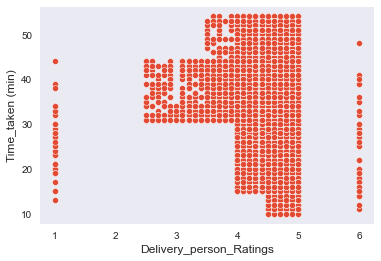

In [447]:
sns.scatterplot(x='Delivery_person_Ratings',y='Time_taken (min)',data=df)

<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Time_taken (min)'>

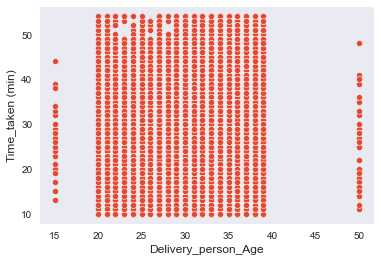

In [448]:
sns.scatterplot(x='Delivery_person_Age',y='Time_taken (min)',data=df)

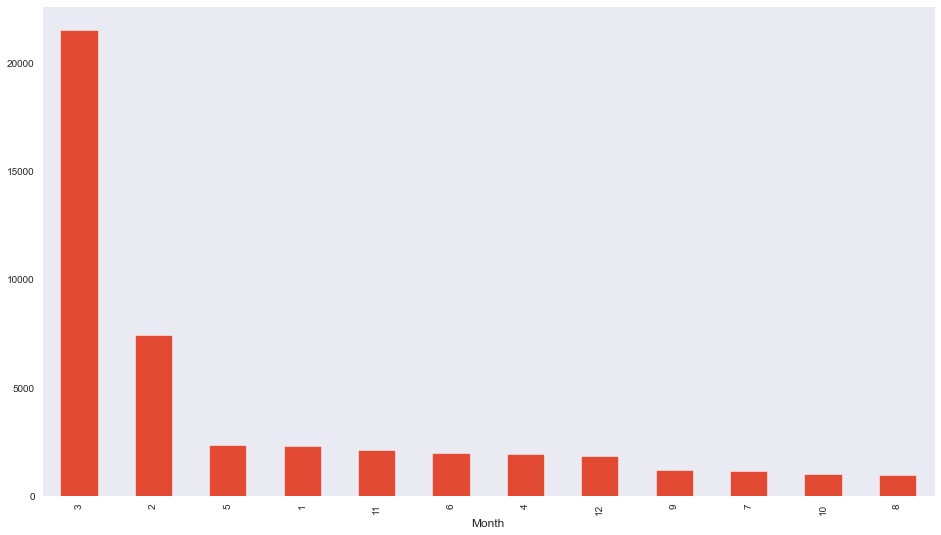

In [449]:
plt.figure(figsize=(16,9))
df['Order_Date']= pd.to_datetime(df['Order_Date'])
df['Month']= df['Order_Date'].dt.month
df['Day']= df['Order_Date'].dt.day

df.groupby('Month')['ID'].count().sort_values(ascending=False).plot(kind='bar');

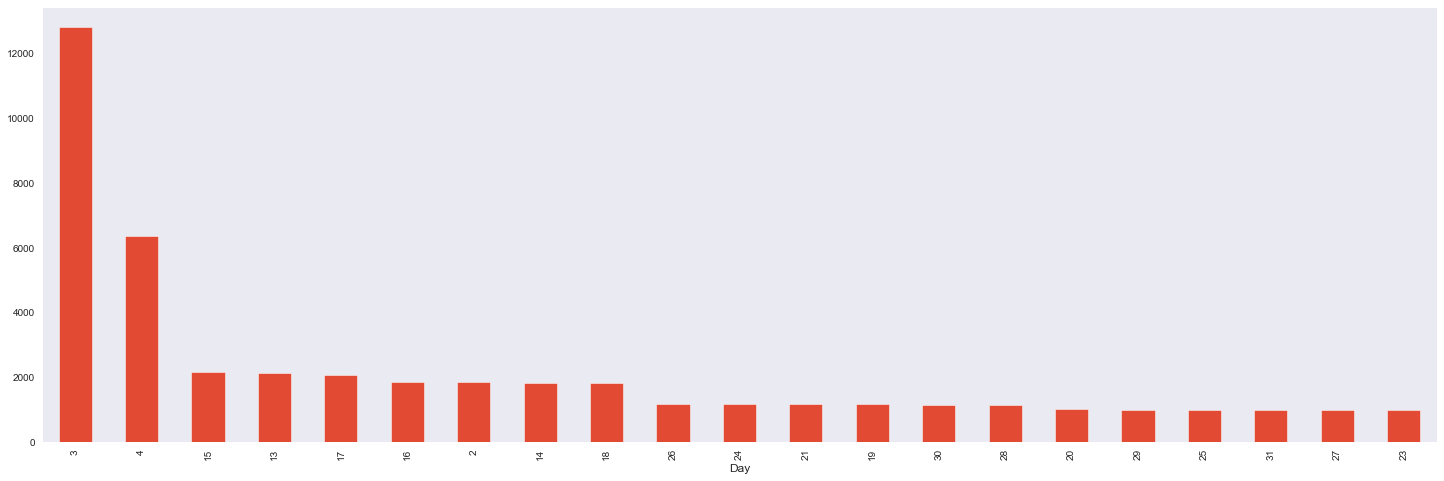

In [450]:
plt.figure(figsize=(25,8))
df.groupby('Day')['ID'].count().sort_values(ascending=False).plot(kind='bar');

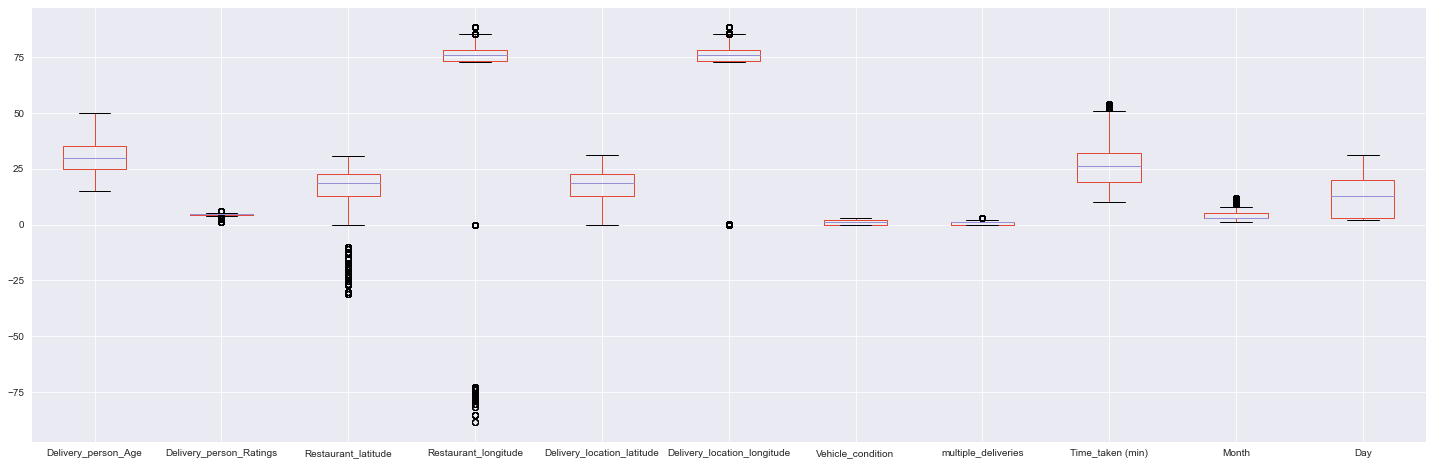

In [451]:
plt.figure(figsize=(25,8))
df.boxplot();

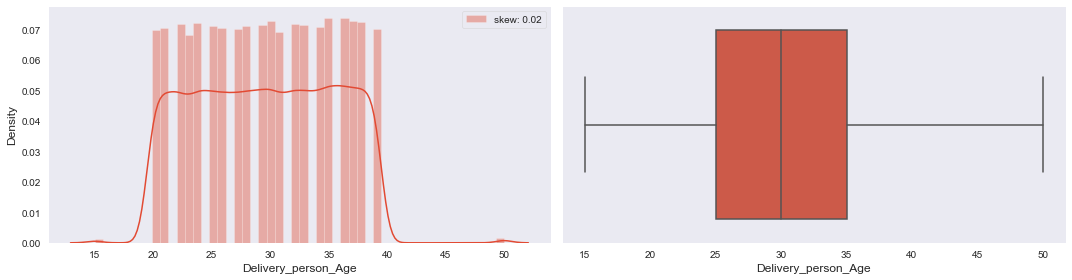

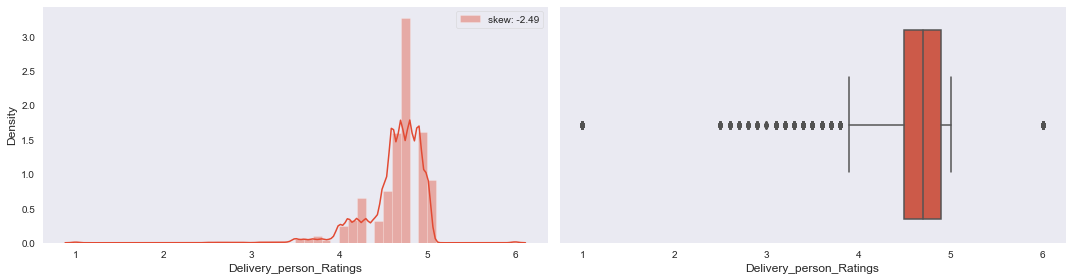

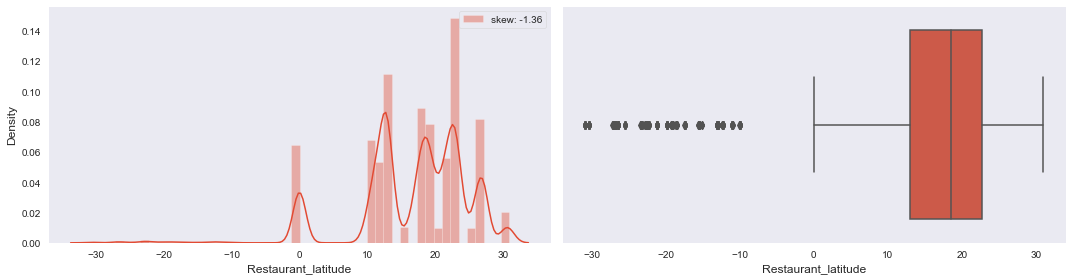

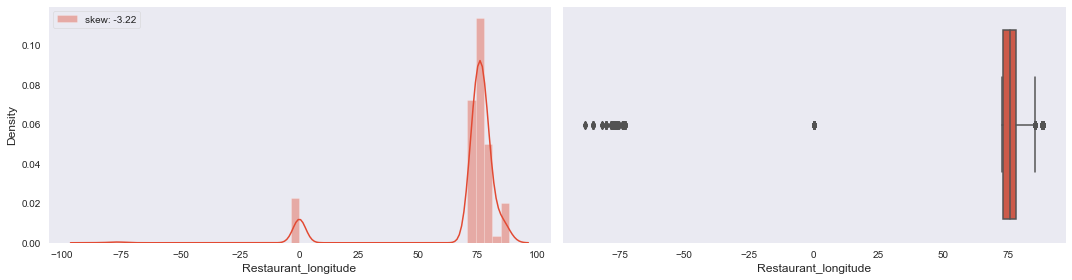

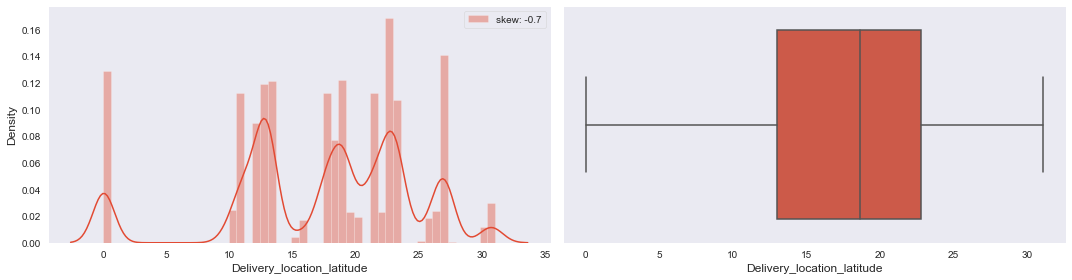

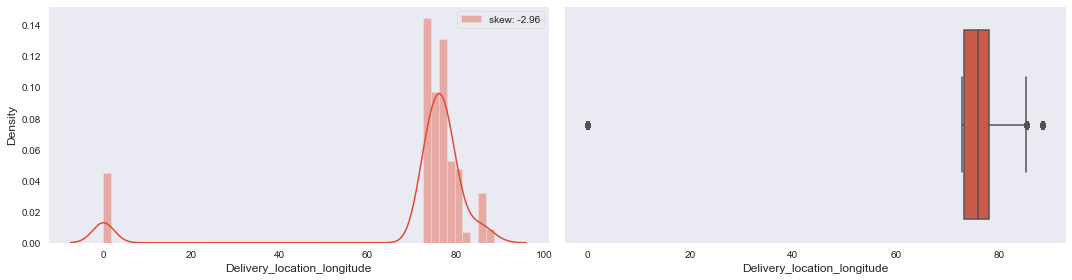

TypeError: 'DatetimeArray' does not implement reduction 'skew'

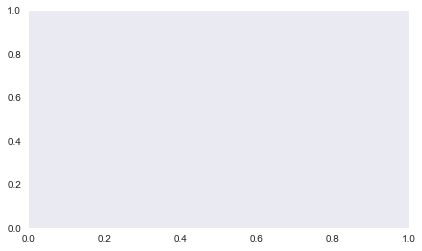

In [452]:
sns.set_style('dark')
for col in df.select_dtypes(exclude='object'):
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [453]:
data1 = df.groupby(['Time_taken (min)']).mean().reset_index()
data1

Time_taken (min)  Delivery_person_Age  Delivery_person_Ratings  \
0                 10            25.300690                 4.756846   
1                 11            25.325452                 4.758217   
2                 12            25.574230                 4.753576   
3                 13            25.053701                 4.758200   
4                 14            25.043662                 4.751904   
5                 15            28.049304                 4.737979   
6                 16            27.789762                 4.740061   
7                 17            28.034948                 4.746839   
8                 18            28.112227                 4.740568   
9                 19            28.078431                 4.738257   
10                20            28.590823                 4.717706   
11                21            28.591059                 4.709546   
12                22            28.689258                 4.719283   
13                23            28.596580                 4.705076   
14                24            28.492853                 4.716936   
15                25            30.492394                 4.715557   
16                26            30.289628                 4.721880   
17                27            30.232877                 4.715437   
18                28            30.450970                 4.720231   
19                29            30.369124                 4.721949   
20                30            31.611350                 4.717556   
21                31            31.354811                 4.379725   
22                32            31.340824                 4.359551   
23                33            31.622610                 4.378055   
24                34            31.512043                 4.352415   
25                35            30.988792                 4.381297   
26                36            31.221271                 4.426928   
27                37            31.242462                 4.405409   
28                38            30.945093                 4.396019   
29                39            31.373934                 4.375883   
30                40            31.984962                 4.419173   
31                41            31.524436                 4.429699   
32                42            31.493506                 4.440631   
33                43            31.547794                 4.407380   
34                44            31.626415                 4.448302   
35                45            32.623894                 4.568142   
36                46            32.492537                 4.535581   
37                47            32.532609                 4.567029   
38                48            32.655172                 4.566667   
39                49            32.992366                 4.540840   
40                50            32.893939                 4.512121   
41                51            33.615385                 4.516484   
42                52            31.675676                 4.494595   
43                53            32.419355                 4.507527   
44                54            32.651163                 4.465116   

    Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0             16.850955             70.576380                   17.304229   
1             17.028833             70.541925                   17.385343   
2             17.180797             69.899171                   17.517619   
3             17.409321             71.065374                   17.615061   
4             16.949660             70.063350                   17.391949   
5             16.639869             68.948193                   17.178758   
6             16.995672             70.477668                   17.486454   
7             16.802206             69.608776                   17.204855   
8             16.671697             69.438993                   17.138347   
9            

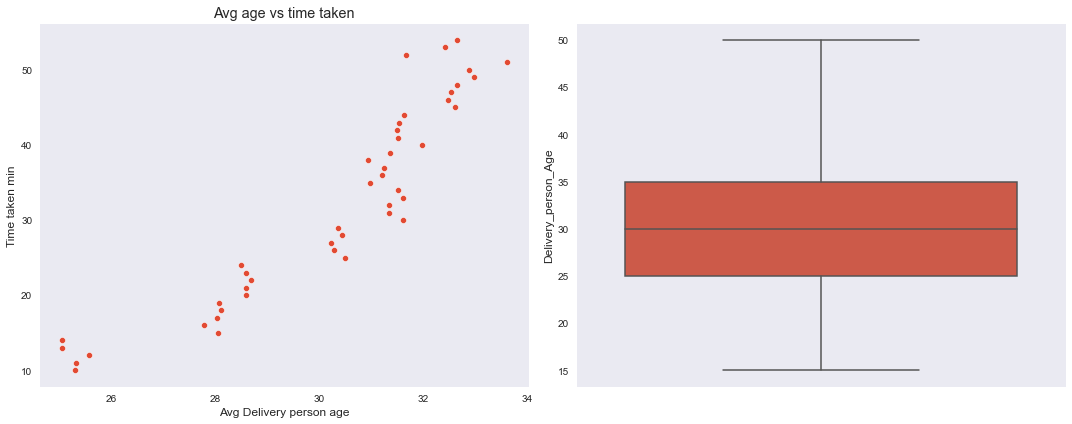

In [454]:
# The avg delivery person age w.r.t Time taken in min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(x='Delivery_person_Age',y='Time_taken (min)',data=data1)
plt.xlabel('Avg Delivery person age')
plt.ylabel("Time taken min")
plt.title('Avg age vs time taken')

plt.subplot(1,2,2)
sns.boxplot(y=df['Delivery_person_Age'])
plt.tight_layout()
plt.show()

In [455]:
df.sample()

ID Delivery_person_ID  Delivery_person_Age  \
33642  0xde14      KNPRES05DEL01                 38.0   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
33642                      5.0            26.479108             80.315042   

       Delivery_location_latitude  Delivery_location_longitude Order_Date  \
33642                   26.489108                    80.325042 2022-11-02   

      Time_Orderd  ... Road_traffic_density Vehicle_condition Type_of_order  \
33642       09:40  ...                  Low                 1        Drinks   

       Type_of_vehicle multiple_deliveries Festival   City Time_taken (min)  \
33642       motorcycle                 0.0       No  Urban               13   

      Month  Day  
33642    11    2  

[1 rows x 22 columns]

In [456]:
df['Time_Orderd'].isnull().sum()

1731

In [457]:
df['Time_Orderd'].fillna(df['Time_Orderd'].mode()[0] , inplace=True)

In [458]:
df['Time_Orderd'].isnull().sum()

0

In [459]:
df['Time_Orderd']=df['Time_Orderd'].str.replace('.',':')

In [460]:
df['Time_Orderd_hour']=df['Time_Orderd'].str.split(':').str.get(0)
df['Time_Orderd_min']=df['Time_Orderd'].str.split(':').str.get(1)

In [461]:
df['Time_Orderd_hour'].isnull().sum()

0

In [462]:
df['Time_Orderd_min'].isnull().sum()

430

In [463]:
df[df['Time_Orderd_min'].isnull()][['Time_Orderd','Time_Orderd_hour','Time_Orderd_min']]

Time_Orderd Time_Orderd_hour Time_Orderd_min
116             1                1             NaN
599             1                1             NaN
696             1                1             NaN
825             1                1             NaN
886             1                1             NaN
...           ...              ...             ...
45076           1                1             NaN
45095           1                1             NaN
45163           1                1             NaN
45487           1                1             NaN
45522           1                1             NaN

[430 rows x 3 columns]

In [464]:
df['Time_Orderd_min'].fillna(0,inplace=True)

In [465]:
df['Time_Orderd_min']=df['Time_Orderd_min'].astype('int')

In [466]:
df['Time_Orderd_hour']=df['Time_Orderd_hour'].astype('int')

In [467]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)', 'Month',
       'Day', 'Time_Orderd_hour', 'Time_Orderd_min'],
      dtype='object')

In [468]:
df['Time_Order_picked'].isnull().sum()

0

In [469]:
df[df['Time_Order_picked'].str.contains(':')].shape

(41457, 24)

In [470]:
df[~df['Time_Order_picked'].str.contains(':')].shape

(4127, 24)

In [471]:
df[~df['Time_Order_picked'].str.contains(':')][['Time_Orderd','Time_Order_picked']]

Time_Orderd Time_Order_picked
36          10:55       0.458333333
46          17:55              0.75
47          22:45       0.958333333
52          21:55       0.916666667
57          20:55             0.875
...           ...               ...
45526       23:50                 1
45530       20:50             0.875
45538       10:45       0.458333333
45566       21:45       0.916666667
45577       21:55       0.916666667

[4127 rows x 2 columns]

In [472]:
df['Time_Order_picked']=df['Time_Order_picked'].str.replace('.',':')

In [473]:
df['Time_Order_picked_hour']=df['Time_Order_picked'].str.split(':').str.get(0)
df['Time_Order_picked_min']=df['Time_Order_picked'].str.split(':').str.get(1)

In [474]:
df.sample()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
3541  0xbd7d   RANCHIRES17DEL01                 38.0                      4.4   

      Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
3541            23.374878             85.335739                   23.444878   

      Delivery_location_longitude Order_Date Time_Orderd  ...  \
3541                    85.405739 2022-03-14       18:40  ...   

     multiple_deliveries Festival   City  Time_taken (min) Month Day  \
3541                 0.0       No  Urban                33     3  14   

      Time_Orderd_hour Time_Orderd_min Time_Order_picked_hour  \
3541                18              40                     18   

      Time_Order_picked_min  
3541                     55  

[1 rows x 26 columns]

In [475]:
df['Time_Order_picked_hour'].value_counts()

21    4402
22    4367
18    4358
20    4316
23    4263
19    4245
0     3687
17    3607
10    1916
09    1849
11    1831
08    1502
12     980
24     880
15     804
14     737
13     715
16     685
1      440
Name: Time_Order_picked_hour, dtype: int64

In [476]:
df['Time_Order_picked_hour']=df['Time_Order_picked_hour'].astype('int')

In [477]:
df[df['Time_Order_picked_min'].isnull()][['Time_Order_picked','Time_Order_picked_hour','Time_Order_picked_min']]

Time_Order_picked  Time_Order_picked_hour Time_Order_picked_min
155                   1                       1                   NaN
157                   1                       1                   NaN
386                   1                       1                   NaN
434                   1                       1                   NaN
533                   1                       1                   NaN
...                 ...                     ...                   ...
45152                 1                       1                   NaN
45210                 1                       1                   NaN
45230                 1                       1                   NaN
45237                 1                       1                   NaN
45526                 1                       1                   NaN

[440 rows x 3 columns]

In [478]:
df['Time_Order_picked_min'].fillna(0 ,inplace=True)

In [479]:
df['Time_Order_picked_min']=df['Time_Order_picked_min'].astype('int')

In [480]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)', 'Month',
       'Day', 'Time_Orderd_hour', 'Time_Orderd_min', 'Time_Order_picked_hour',
       'Time_Order_picked_min'],
      dtype='object')

In [481]:
df['City_name']=df['Delivery_person_ID'].str.split('RES').str.get(0)

In [482]:
df.sample()

ID Delivery_person_ID  Delivery_person_Age  \
30056  0xac7e     PUNERES09DEL03                 20.0   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
30056                      3.6            18.536562             73.896485   

       Delivery_location_latitude  Delivery_location_longitude Order_Date  \
30056                   18.596562                    73.956485 2022-03-19   

      Time_Orderd  ... Festival           City Time_taken (min)  Month Day  \
30056       20:15  ...       No  Metropolitian               40      3  19   

      Time_Orderd_hour  Time_Orderd_min Time_Order_picked_hour  \
30056               20               15                     20   

      Time_Order_picked_min  City_name  
30056                    30       PUNE  

[1 rows x 27 columns]

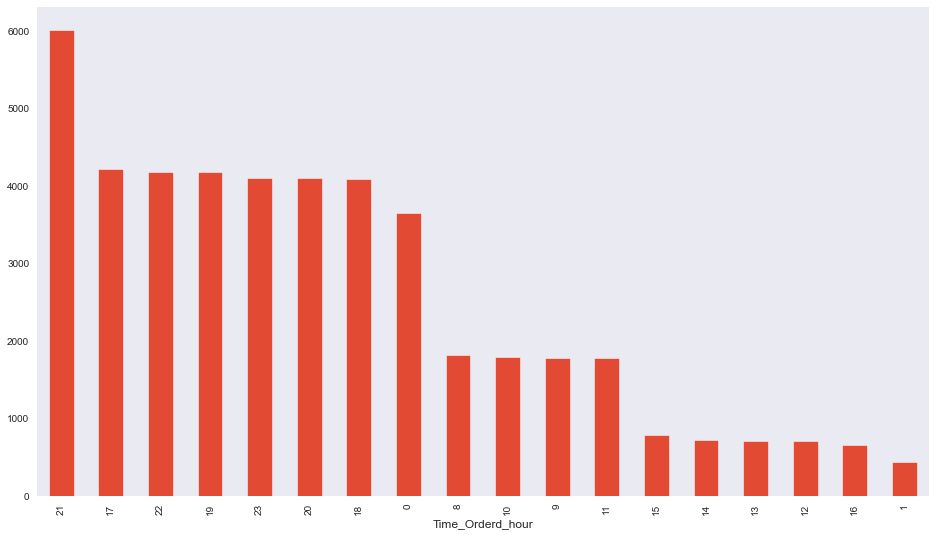

In [483]:
plt.figure(figsize=(16,9))
df.groupby('Time_Orderd_hour')['ID'].count().sort_values(ascending=False).plot(kind='bar');

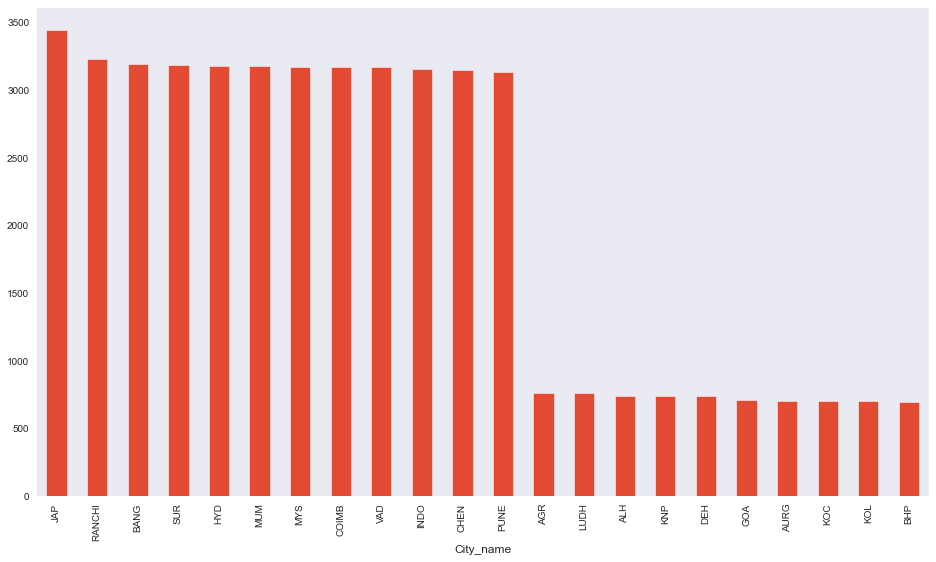

In [484]:
plt.figure(figsize=(16,9))
df.groupby('City_name')['ID'].count().sort_values(ascending=False).plot(kind='bar');

In [485]:
df.sample()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
7962  0x4578      SURRES16DEL01                 25.0                      4.9   

      Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
7962            21.160437             72.774209                   21.230437   

      Delivery_location_longitude Order_Date Time_Orderd  ... Festival  \
7962                    72.844209 2022-03-20       23:50  ...       No   

               City Time_taken (min)  Month Day Time_Orderd_hour  \
7962  Metropolitian               21      3  20               23   

      Time_Orderd_min Time_Order_picked_hour Time_Order_picked_min  City_name  
7962               50                      1                     0        SUR  

[1 rows x 27 columns]

In [486]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)', 'Month',
       'Day', 'Time_Orderd_hour', 'Time_Orderd_min', 'Time_Order_picked_hour',
       'Time_Order_picked_min', 'City_name'],
      dtype='object')

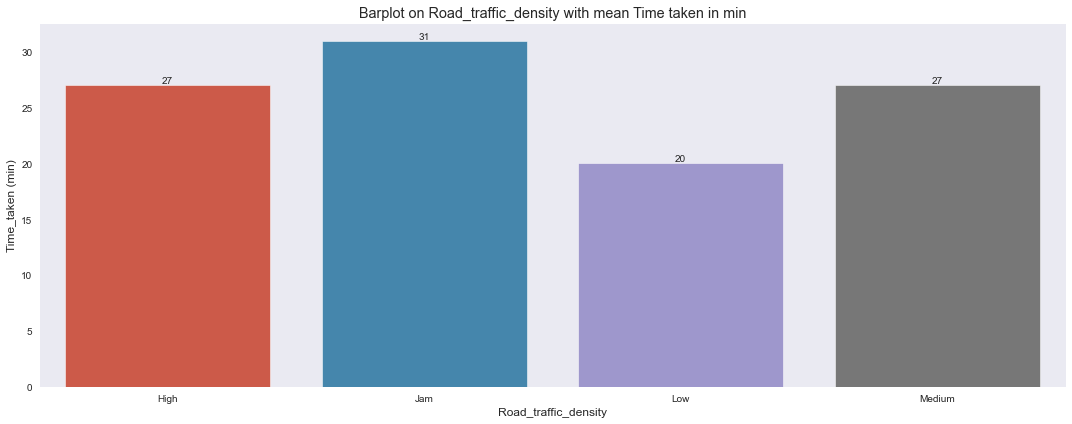

In [487]:
# plotting a countplot of Road traffic density and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

data1 = df.groupby(['Road_traffic_density']).median().reset_index()

ax = sns.barplot(x='Road_traffic_density', y='Time_taken (min)',
                data=data1)

plt.title('Barplot on Road_traffic_density with mean Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i)

<AxesSubplot:xlabel='Weather_conditions'>

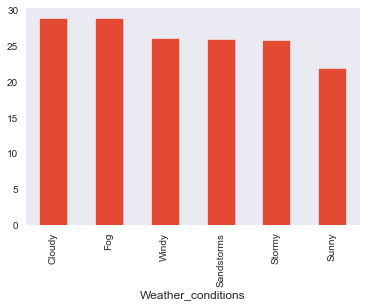

In [488]:
df.groupby('Weather_conditions')['Time_taken (min)'].mean().sort_values(ascending=False).plot(kind='bar')

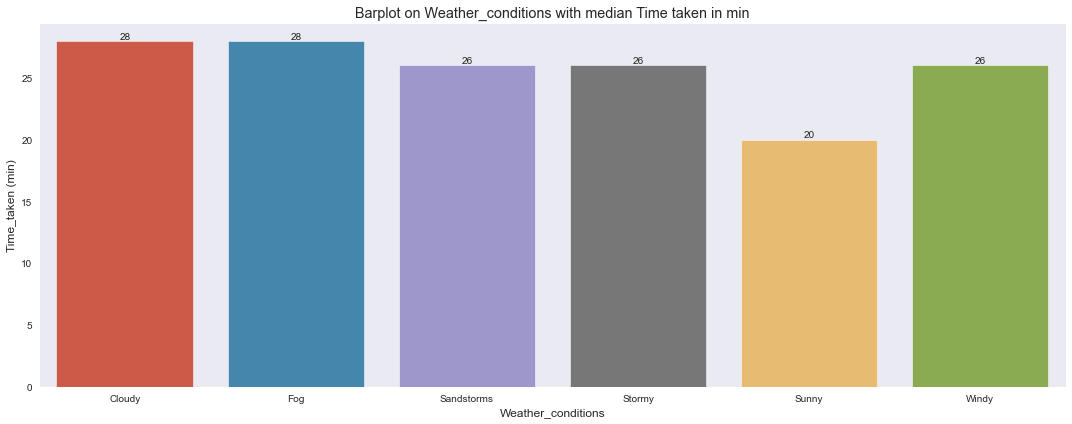

In [489]:
# plotting a countplot of Road traffic density and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

data1 = df.groupby(['Weather_conditions']).median().reset_index()

ax = sns.barplot(x='Weather_conditions', y='Time_taken (min)',
                data=data1)


plt.title('Barplot on Weather_conditions with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i)

In [490]:
df.sample()

ID Delivery_person_ID  Delivery_person_Age  \
34444  0x2aa3     PUNERES18DEL02                 25.0   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
34444                      4.3            18.593481             73.785901   

       Delivery_location_latitude  Delivery_location_longitude Order_Date  \
34444                   18.673481                    73.865901 2022-03-23   

      Time_Orderd  ... Festival           City Time_taken (min)  Month Day  \
34444       21:15  ...       No  Metropolitian               36      3  23   

      Time_Orderd_hour  Time_Orderd_min Time_Order_picked_hour  \
34444               21               15                     21   

      Time_Order_picked_min  City_name  
34444                    20       PUNE  

[1 rows x 27 columns]

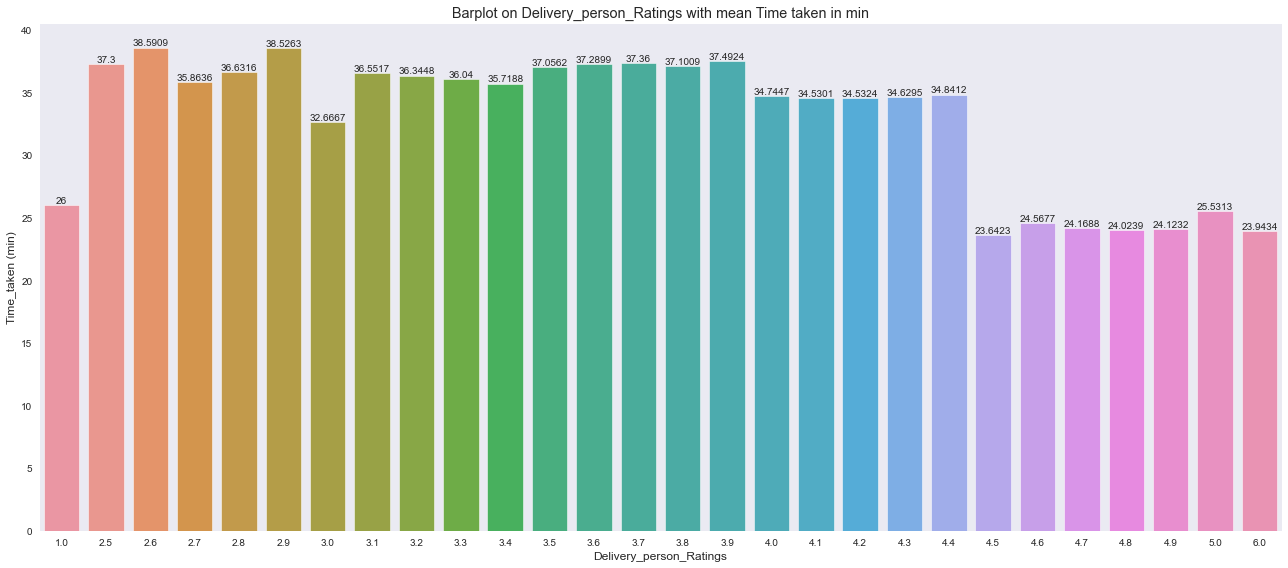

In [491]:
# plotting a countplot of Delivery_person_Ratings and bar plot w.r.t mean time taken min
plt.figure(figsize=(18,8))

data1 = df.groupby(['Delivery_person_Ratings']).mean().reset_index()

ax = sns.barplot(x='Delivery_person_Ratings', y='Time_taken (min)',
                data=data1)

plt.title('Barplot on Delivery_person_Ratings with mean Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i)

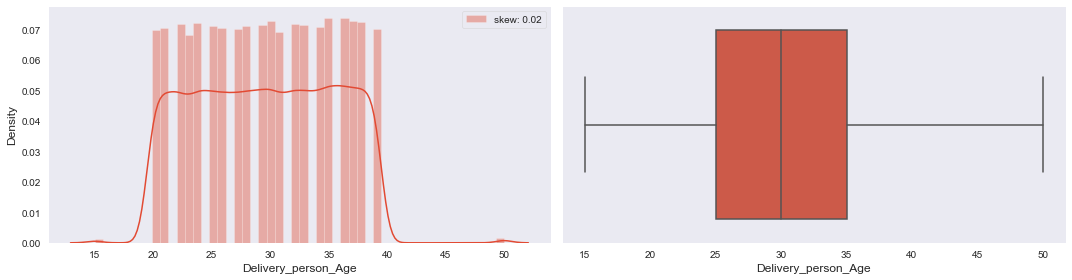

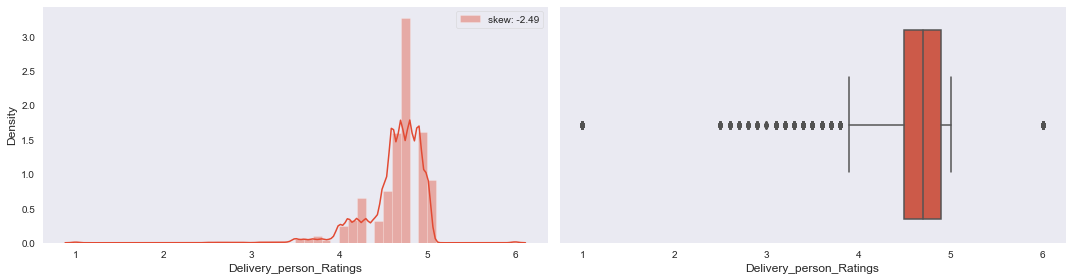

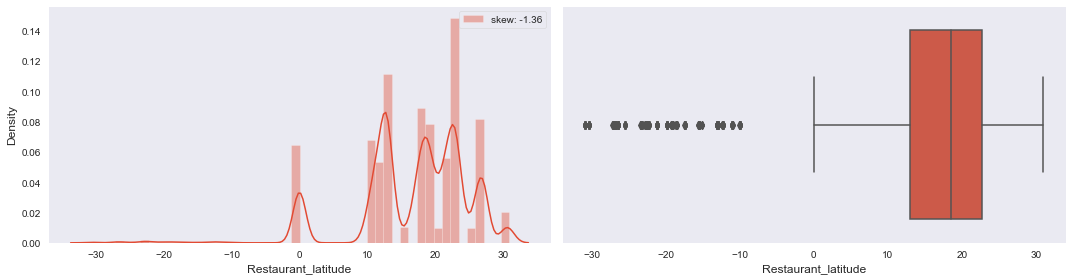

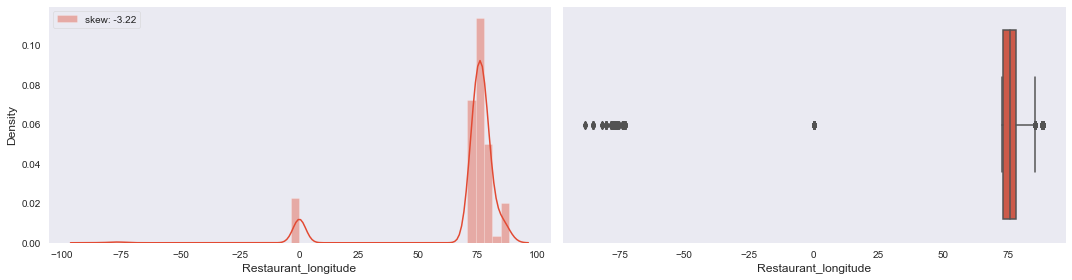

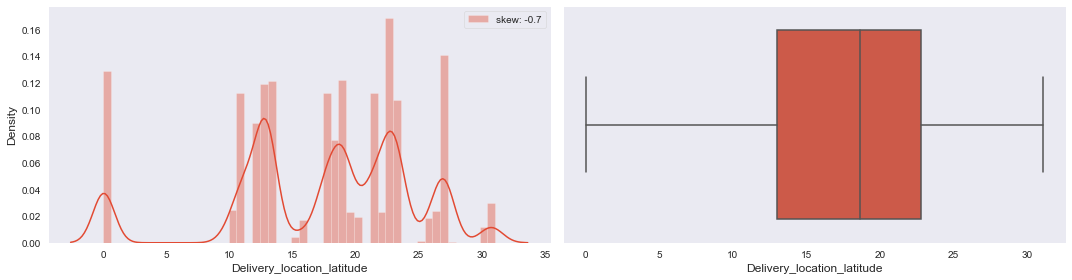

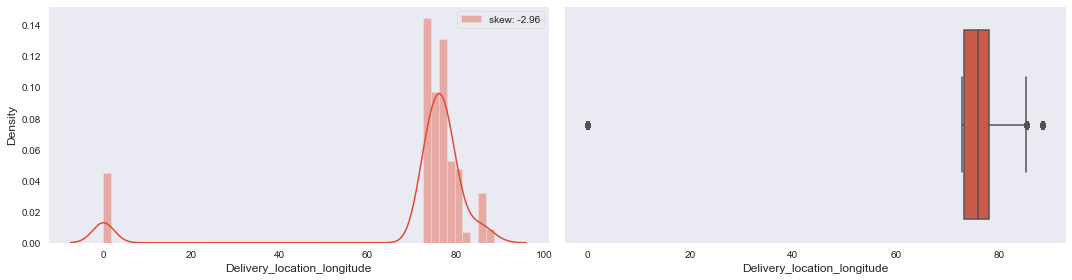

TypeError: 'DatetimeArray' does not implement reduction 'skew'

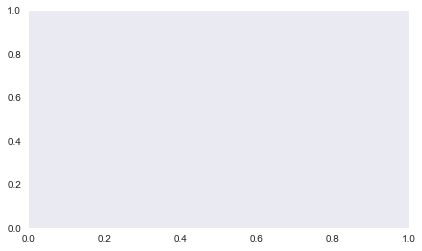

In [492]:
sns.set_style('dark')
for col in df.select_dtypes(exclude='object'):
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [493]:
df.shape

(45584, 27)

In [505]:
np.number

numpy.number

In [506]:
df.select_dtypes(include=np.number).columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'Month', 'Day',
       'Time_Orderd_hour', 'Time_Orderd_min', 'Time_Order_picked_hour',
       'Time_Order_picked_min'],
      dtype='object')

In [508]:
outliers_df = pd.DataFrame(columns=df.columns)

for col in df.select_dtypes(include=np.number):
    stat = df[col].describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    
    outliers = df[(df[col] > upper) | (df[col] < lower)]

    if not outliers.empty:
        print(f'\nOutlier found in: {col}')
        outliers_df = pd.concat([outliers_df, outliers])
    else:
        print(f'\nNo outlier found in: {col}')

    print(f'\nSuspected Outliers Lower Bound: {lower}')
    print(f'Suspected Outliers Upper Bound: {upper}\n\n')

print(f'Total Number of outlier rows: {len(outliers_df)}')


count    43730.000000
mean        29.566911
std          5.815064
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: Delivery_person_Age, dtype: float64

No outlier found in: Delivery_person_Age

Suspected Outliers Lower Bound: 10.0
Suspected Outliers Upper Bound: 50.0


count    43676.000000
mean         4.633774
std          0.334744
min          1.000000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: Delivery_person_Ratings, dtype: float64

Outlier found in: Delivery_person_Ratings

Suspected Outliers Lower Bound: 3.8999999999999995
Suspected Outliers Upper Bound: 5.500000000000001


count    45584.000000
mean        17.017948
std          8.185674
min        -30.905562
25%         12.933284
50%         18.551440
75%         22.728163
max         30.914057
Name: Restaurant_latitude, dtype: float64

Outlier found in: Restaurant_latitude

Suspected Outliers Lower Bound: -1.7

In [509]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [510]:
features = [i for i in df.select_dtypes(exclude='object').columns]

In [511]:
features

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Order_Date',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)',
 'Month',
 'Day',
 'Time_Orderd_hour',
 'Time_Orderd_min',
 'Time_Order_picked_hour',
 'Time_Order_picked_min']

In [512]:
iqr_capping(df, features, 1.5)

In [513]:
outliers_df = pd.DataFrame(columns=df.columns)

for col in df.select_dtypes(exclude='object'):
    stat = df[col].describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    
    outliers = df[(df[col] > upper) | (df[col] < lower)]

    if not outliers.empty:
        print(f'\nOutlier found in: {col}')
        outliers_df = pd.concat([outliers_df, outliers])
    else:
        print(f'\nNo outlier found in: {col}')

    print(f'\nSuspected Outliers Lower Bound: {lower}')
    print(f'Suspected Outliers Upper Bound: {upper}\n\n')

print(f'Total Number of outlier rows: {len(outliers_df)}')


count    43730.000000
mean        29.566911
std          5.815064
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: Delivery_person_Age, dtype: float64

No outlier found in: Delivery_person_Age

Suspected Outliers Lower Bound: 10.0
Suspected Outliers Upper Bound: 50.0


count    43676.000000
mean         4.645588
std          0.280588
min          3.900000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.500000
Name: Delivery_person_Ratings, dtype: float64

No outlier found in: Delivery_person_Ratings

Suspected Outliers Lower Bound: 3.8999999999999995
Suspected Outliers Upper Bound: 5.500000000000001


count    45584.000000
mean        17.193276
std          7.537046
min         -1.759034
25%         12.933284
50%         18.551440
75%         22.728163
max         30.914057
Name: Restaurant_latitude, dtype: float64

No outlier found in: Restaurant_latitude

Suspected Outliers Lower Bound

In [514]:
outliers_df.shape

(0, 27)

In [208]:
folium.Map(titles='cartodb positron')

In [211]:
# plotting Restaurant lattitude and Restaurant longitude
import plotly.express as px
data1 = df.copy()
data1.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(data1, lat="Restaurant_latitude", lon="Restaurant_longitude", color_continuous_scale=color_scale,zoom=8, 
                        height=1000,width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
# latitude of india is 8°4` N  to 37°6` North
# longitude of india is 68°7` E to 97°25` East



# this data set is realted to india. but in some of latitidude is given in negative(-), negative lattitude is related
# to indian ocean ..

# so that there is much chances that negative sign in lattitude is by mistake

In [515]:
# changing -ve to +ve dataset
"""
abs() function return the absolute value. The absolute
value of any number is always positive it removes the negative sign of a number in Python.
"""
df['Restaurant_latitude'] = df['Restaurant_latitude']

In [516]:
df.sample()

ID Delivery_person_ID  Delivery_person_Age  \
39750  0xae59    COIMBRES18DEL03                 39.0   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
39750                      4.1             11.02091             76.940432   

       Delivery_location_latitude  Delivery_location_longitude  \
39750                    11.05091                    76.970432   

                Order_Date Time_Orderd  ... Festival           City  \
39750  1641168000000000000       20:50  ...       No  Metropolitian   

      Time_taken (min)  Month  Day Time_Orderd_hour  Time_Orderd_min  \
39750             33.0    1.0  3.0             20.0             50.0   

      Time_Order_picked_hour Time_Order_picked_min  City_name  
39750                   20.0                  55.0      COIMB  

[1 rows x 27 columns]

In [517]:
import math

def distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    R = 6371.0 # Earth's radius in km
    dist = R * c
    
    return dist

df['distance'] = df.apply(lambda row : distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'],row['Delivery_location_longitude']),axis=1)

In [518]:
df['distance']

0        10.280582
1         6.242319
2        13.787860
3         2.930258
4        19.396618
           ...    
45579     1.489846
45580    21.535060
45581     4.657195
45582     6.232393
45583     9.171555
Name: distance, Length: 45584, dtype: float64

In [519]:
# droping those lattitude and longitude which are less than and above to
# latitude of india is 8°4` N  to 37°6` North
# longitude of india is 68°7` E to 97°25` East

In [520]:
df[(df['Restaurant_latitude'] < 8) & (df['Delivery_location_latitude'] < 8)].shape

# these 3509 record is of no use. bcz the wrong lattitude is mention

(3640, 28)

In [521]:
# droping  where  restaurant_lattitude and delivery_location_latitude less than 8

df = df.drop(df[(df['Restaurant_latitude'] < 8) & (df['Delivery_location_latitude'] < 8)].index)

In [522]:
df[(df['Restaurant_latitude'] > 37) & (df['Delivery_location_latitude'] > 37)]

Empty DataFrame
Columns: [ID, Delivery_person_ID, Delivery_person_Age, Delivery_person_Ratings, Restaurant_latitude, Restaurant_longitude, Delivery_location_latitude, Delivery_location_longitude, Order_Date, Time_Orderd, Time_Order_picked, Weather_conditions, Road_traffic_density, Vehicle_condition, Type_of_order, Type_of_vehicle, multiple_deliveries, Festival, City, Time_taken (min), Month, Day, Time_Orderd_hour, Time_Orderd_min, Time_Order_picked_hour, Time_Order_picked_min, City_name, distance]
Index: []

[0 rows x 28 columns]

In [523]:
df[(df['Restaurant_longitude'] < 68) & (df['Delivery_location_longitude'] < 68)]

Empty DataFrame
Columns: [ID, Delivery_person_ID, Delivery_person_Age, Delivery_person_Ratings, Restaurant_latitude, Restaurant_longitude, Delivery_location_latitude, Delivery_location_longitude, Order_Date, Time_Orderd, Time_Order_picked, Weather_conditions, Road_traffic_density, Vehicle_condition, Type_of_order, Type_of_vehicle, multiple_deliveries, Festival, City, Time_taken (min), Month, Day, Time_Orderd_hour, Time_Orderd_min, Time_Order_picked_hour, Time_Order_picked_min, City_name, distance]
Index: []

[0 rows x 28 columns]

In [524]:
df.sample()

ID Delivery_person_ID  Delivery_person_Age  \
28631  0x29df      JAPRES05DEL03                 28.0   

       Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
28631                      4.7            26.905287             75.794592   

       Delivery_location_latitude  Delivery_location_longitude  \
28631                   27.045287                    75.934592   

                Order_Date Time_Orderd  ...           City Time_taken (min)  \
28631  1647388800000000000       18:40  ...  Metropolitian             20.0   

      Month   Day Time_Orderd_hour Time_Orderd_min  Time_Order_picked_hour  \
28631   3.0  16.0             18.0            40.0                    18.0   

      Time_Order_picked_min City_name   distance  
28631                  45.0       JAP  20.852271  

[1 rows x 28 columns]

In [525]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)', 'Month',
       'Day', 'Time_Orderd_hour', 'Time_Orderd_min', 'Time_Order_picked_hour',
       'Time_Order_picked_min', 'City_name', 'distance'],
      dtype='object')

In [526]:
#dropping those cols not useful in model building

In [527]:
df.drop(columns=['ID','Delivery_person_ID','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                 'Delivery_location_longitude','Order_Date','Time_Orderd','Time_Order_picked','Month','Day','Time_Orderd_hour',
                'Time_Orderd_min','Time_Order_picked_hour','Time_Order_picked_min','City_name','Type_of_order','Type_of_vehicle',
                'Festival','Vehicle_condition','multiple_deliveries','City'] ,inplace=True)

In [528]:
df.sample(2)

Delivery_person_Age  Delivery_person_Ratings Weather_conditions  \
39761                 25.0                      4.6             Cloudy   
21109                 32.0                      5.0             Cloudy   

      Road_traffic_density  Time_taken (min)  distance  
39761                  Low              18.0  4.469194  
21109                  Low              16.0  1.509480

In [529]:
df.rename(columns={'Time_taken (min)':'Time_taken'},inplace=True)

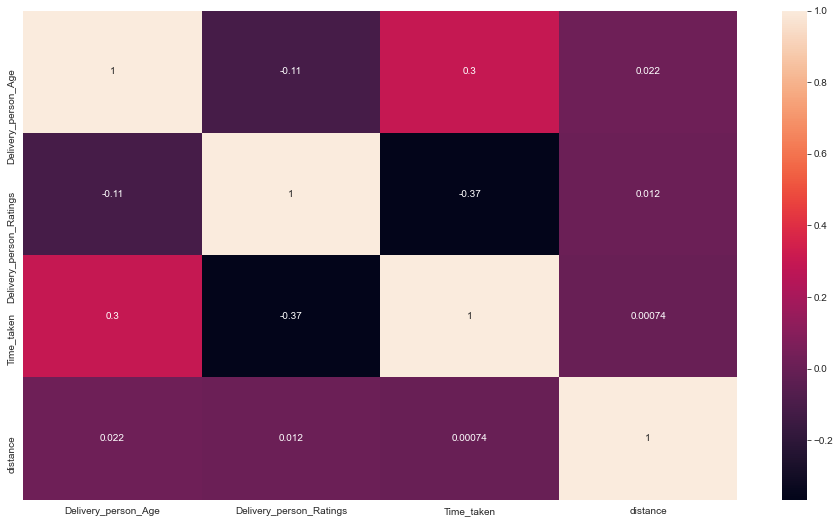

In [530]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True);

In [531]:
df.shape

(41944, 6)

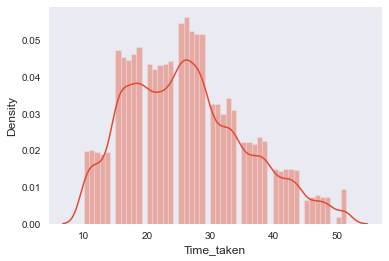

In [532]:
sns.distplot(df['Time_taken']);

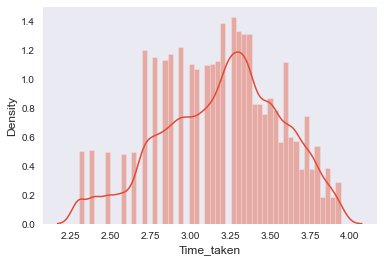

In [533]:
sns.distplot(np.log(df['Time_taken']));

In [534]:
num_feature = df.drop('Time_taken',axis=1).select_dtypes(exclude='object').columns
cat_feature = df.select_dtypes(include='object').columns

In [535]:
num_feature

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'distance'], dtype='object')

In [536]:
cat_feature

Index(['Weather_conditions', 'Road_traffic_density'], dtype='object')

In [537]:
 numeric_transformer = Pipeline(
     steps=[ ("imputer", SimpleImputer(strategy='median'))
               , ("scaler", StandardScaler())
           ]
 )
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [538]:
categorical_transformer = Pipeline(
     steps=[
         ("imputer_cat", SimpleImputer(strategy='most_frequent')),
        ("encoder", OneHotEncoder(sparse=False,handle_unknown='ignore')),
        ("scaler", StandardScaler())
               ]
)
categorical_transformer

Pipeline(steps=[('imputer_cat', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('scaler', StandardScaler())])

In [539]:
preprocessor = ColumnTransformer(
    transformers=[
         ("num", numeric_transformer, num_feature),
         ("cat", categorical_transformer, cat_feature),
     ]
 )
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'distance'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer_cat',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Weather_conditions', 'Road_traffic_density'], dtype='object'))])

In [540]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
            ("model", XGBRegressor()
           
           )
          ]
 )

In [541]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'distance'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(...
                              interaction_constraints=None, learning_rate=None,
                              max_delta_step=None, max_depth=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, reg_alpha=None,
                              reg_lambda=None, scale_pos_weight=None,
                              subsample=None, tree_method=None,
                              validate_parameters=None, verbosity=None))])

In [542]:
X=df.drop(columns=['Time_taken'])

In [545]:
X.shape

(41944, 5)

In [543]:
y=df['Time_taken']

In [544]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=10, scoring='r2').mean()

0.6959706863357267

In [546]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [547]:
# train
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'distance'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(...
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [548]:
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)

In [549]:
r2_score(y_test,y_pred)

0.7005738475325005

In [550]:
r2_score(y_train,y_train_pred)

0.759377019520733

In [358]:
params={'model__n_estimators':[120,90,150],'model__max_depth':[20,10],'model__learning_rate':[0.1,0.4,0.03],
        'model__reg_lambda':[0.8,2],'model__gamma':[1,2,0.5],'model__min_child_weight':[2,3],'model__reg_alpha':[0.5,.2]}

In [359]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='r2')
grid.fit(X_train, y_train)

ERROR! Session/line number was not unique in database. History logging moved to new session 688


In [ ]:
grid.best_score_

In [ ]:
grid.best_params_